# Main data import / EDA

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import statistics

In [2]:
raw_data = pd.read_excel('Entries_for_092021_090922.xlsx')

In [3]:
raw_data.head()

,CREATION_TIMESTAMP,Recreation Employee,FACILITY_NAME,GENDER
0,2022-03-29 00:08:47.670,Employee,John Wooden Center Front Desk,Woman
1,2022-03-30 01:07:27.500,Employee,John Wooden Center Front Desk,Woman
2,2022-03-30 23:53:18.163,Employee,John Wooden Center Front Desk,Woman
3,2022-03-31 23:47:06.560,Employee,John Wooden Center Front Desk,Woman
4,2022-04-05 00:08:24.650,Employee,John Wooden Center Front Desk,Woman


In [4]:
raw_data.tail()

,CREATION_TIMESTAMP,Recreation Employee,FACILITY_NAME,GENDER
1048568,2021-09-23 01:23:40.793,Undergraduate Student,John Wooden Center Front Desk,Woman
1048569,2021-09-28 19:27:20.593,Undergraduate Student,John Wooden Center Front Desk,Woman
1048570,2021-09-30 19:26:15.063,Undergraduate Student,John Wooden Center Front Desk,Woman
1048571,2021-09-24 17:58:49.833,Undergraduate Student,John Wooden Center Front Desk,Woman
1048572,2021-09-29 16:22:53.683,Undergraduate Student,John Wooden Center Front Desk,Woman


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   CREATION_TIMESTAMP   1048573 non-null  datetime64[ns]
 1   Recreation Employee  1048573 non-null  object        
 2   FACILITY_NAME        1048573 non-null  object        
 3   GENDER               1043101 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [6]:
raw_data['FACILITY_NAME'].value_counts()

John Wooden Center Front Desk      624723
Bruin Fitness Center (BFIT)        264215
KREC                               100967
Sunset Canyon Recreation Center     53302
Student Activities Center            5361
Comp Sports Clubhouse                   5
Name: FACILITY_NAME, dtype: int64

In [7]:
raw_data['GENDER'].value_counts()

Man                                  610543
Woman                                423891
Male                                   3292
Nonbinary                              1690
Female                                 1372
Did not indicate                       1073
Prefer not to answer                    809
Decline to report                       287
Trans Male/Trans Man                     85
Genderqueer/Gender Non-Conforming        41
Transgender man/Trans man                15
Trans Female/Trans Woman                  3
Name: GENDER, dtype: int64

In [8]:
raw_data['Recreation Employee'].value_counts()

Undergraduate Student                                  742040
Graduate Student                                       148155
Employee                                                60609
Recreation Employee                                     39094
Student Affiliate (continuing student or Extension)     23498
Conference Guests                                       19862
 Retiree & Emeriti                                       4848
Alumni                                                   2981
Graduate Student- HA                                     1846
Undergraduate- HA                                        1692
Community                                                1515
Dance Group Access                                       1490
Community Garden Access                                   491
Employee- HA                                              452
Name: Recreation Employee, dtype: int64

In [9]:
raw_data = raw_data.sort_values(by='CREATION_TIMESTAMP')

In [10]:
raw_data.head()

,CREATION_TIMESTAMP,Recreation Employee,FACILITY_NAME,GENDER
1040920,2021-09-20 00:00:16.310,Graduate Student,KREC,Woman
1038505,2021-09-20 00:00:44.933,Undergraduate Student,KREC,Man
1040716,2021-09-20 00:05:44.523,Graduate Student,KREC,Man
1039107,2021-09-20 00:05:52.697,Graduate Student,KREC,Man
1039944,2021-09-20 00:06:52.690,Graduate Student,KREC,Man


In [11]:
# raw_data['CREATION_TIMESTAMP'] = raw_data['CREATION_TIMESTAMP'] + pd.Timedelta(hours = -8)

# Facility Heatchart Data

In [12]:
# make a copy of initial dataframe
facility_heatchart_data = raw_data.copy()

# only keep wooden and bfit
facility_heatchart_data = facility_heatchart_data[facility_heatchart_data['FACILITY_NAME'].isin(['John Wooden Center Front Desk', 'Bruin Fitness Center (BFIT)'])]

# remove UCLA Rec employees (assuming they are not utilizing facility)
facility_heatchart_data = facility_heatchart_data[~facility_heatchart_data['Recreation Employee'].isin(['Recreation Employee', 'Community Garden Access'])]

In [13]:
facility_heatchart_data

,CREATION_TIMESTAMP,Recreation Employee,FACILITY_NAME,GENDER
568758,2021-09-20 12:22:36.017,Undergraduate Student,John Wooden Center Front Desk,Man
1038628,2021-09-20 12:23:06.417,Undergraduate Student,John Wooden Center Front Desk,Man
1039894,2021-09-20 12:23:20.640,Graduate Student,John Wooden Center Front Desk,Man
1046569,2021-09-20 12:29:01.577,Undergraduate Student,John Wooden Center Front Desk,Man
315962,2021-09-20 12:29:02.170,Undergraduate Student,John Wooden Center Front Desk,Man
...,...,...,...,...
460678,2022-09-08 23:57:22.533,Undergraduate Student,Bruin Fitness Center (BFIT),Man
645127,2022-09-08 23:57:53.413,Undergraduate Student,Bruin Fitness Center (BFIT),Man
796897,2022-09-08 23:58:06.017,Undergraduate Student,Bruin Fitness Center (BFIT),Man
324011,2022-09-08 23:58:58.480,Undergraduate Student,Bruin Fitness Center (BFIT),Man


In [14]:
# Data from UCLA Recreation is set with UTC (need to adjust -8 Hrs for PST and -7 Hrs during DST)

dst_start_date = pd.to_datetime("2021-03-14 02:00:00")
dst_end_date = pd.to_datetime("2021-11-07 02:00:00")

facility_heatchart_data.loc[(facility_heatchart_data['CREATION_TIMESTAMP'] < dst_start_date) | (facility_heatchart_data['CREATION_TIMESTAMP'] > dst_end_date), 'CREATION_TIMESTAMP'] += pd.Timedelta(hours = -8)
facility_heatchart_data.loc[(facility_heatchart_data['CREATION_TIMESTAMP'] >= dst_start_date) & (facility_heatchart_data['CREATION_TIMESTAMP'] <= dst_end_date), 'CREATION_TIMESTAMP'] += pd.Timedelta(hours = -7)

# Drop logs between closed hours:
close_time = pd.to_datetime("01:00")
open_time = pd.to_datetime("05:00")

facility_heatchart_data = facility_heatchart_data[~((facility_heatchart_data['CREATION_TIMESTAMP'] >= close_time) & (facility_heatchart_data['CREATION_TIMESTAMP'] < open_time))]

In [15]:
# Label weekdays with the following keys

weekdays = {
        'Monday': 1,
        'Tuesday': 1,
        'Wednesday': 1,
        'Thursday': 1,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
    }

facility_heatchart_data['Day_of_week'] = facility_heatchart_data['CREATION_TIMESTAMP'].dt.day_name().map(weekdays)


In [16]:
# Add hour column

facility_heatchart_data['Hour'] = facility_heatchart_data['CREATION_TIMESTAMP'].dt.hour

In [17]:
# Label wooden/bfit

facilities = {
    'John Wooden Center Front Desk': 'wooden',
    'Bruin Fitness Center (BFIT)': 'bfit'
}

facility_heatchart_data['Facility'] = facility_heatchart_data['FACILITY_NAME'].map(facilities)

In [18]:
len(facility_heatchart_data)

852799

In [19]:
# Remove unused columns

facility_heatchart_data = facility_heatchart_data.drop(columns=['GENDER', 'FACILITY_NAME'])

In [20]:
# For handling datetime functions

facility_heatchart_data = facility_heatchart_data.set_index('CREATION_TIMESTAMP')

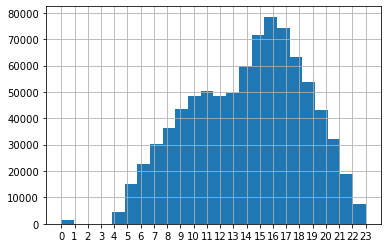

In [21]:
# Checking for reasonable distribution

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
facility_heatchart_data['Hour'].hist(ax=ax, bins=24)
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))
plt.show()

In [22]:
# Separating facilities (will join again later)

# only keep bfit
bfit = facility_heatchart_data[facility_heatchart_data['Facility'].isin(['bfit'])]

# only keep wooden
wooden = facility_heatchart_data[facility_heatchart_data['Facility'].isin(['wooden'])]

In [23]:
bfit

,Recreation Employee,Day_of_week,Hour,Facility
CREATION_TIMESTAMP,,,,
2021-09-22 16:21:14.653,Undergraduate Student,1,16,bfit
2021-09-22 16:25:39.610,Undergraduate Student,1,16,bfit
2021-09-22 16:25:45.790,Undergraduate Student,1,16,bfit
2021-09-22 16:34:07.073,Undergraduate Student,1,16,bfit
2021-09-22 16:40:07.330,Undergraduate Student,1,16,bfit
...,...,...,...,...
2022-09-08 15:57:22.533,Undergraduate Student,1,15,bfit
2022-09-08 15:57:53.413,Undergraduate Student,1,15,bfit
2022-09-08 15:58:06.017,Undergraduate Student,1,15,bfit


In [24]:
wooden

,Recreation Employee,Day_of_week,Hour,Facility
CREATION_TIMESTAMP,,,,
2021-09-20 05:22:36.017,Undergraduate Student,1,5,wooden
2021-09-20 05:23:06.417,Undergraduate Student,1,5,wooden
2021-09-20 05:23:20.640,Graduate Student,1,5,wooden
2021-09-20 05:29:01.577,Undergraduate Student,1,5,wooden
2021-09-20 05:29:02.170,Undergraduate Student,1,5,wooden
...,...,...,...,...
2022-09-08 06:18:00.000,Undergraduate Student,1,6,wooden
2022-09-08 06:31:45.530,Undergraduate Student,1,6,wooden
2022-09-08 07:44:13.987,Undergraduate Student,1,7,wooden


In [93]:
# Initialize new dataframe (formatted for .js, will be joined together)

facility_heatchart_columns = {
    'day_of_week': float,
    'hour': int,
    'n_people': float,
    'n_people_rel': float,
    'category': float,
    'facility': str
}

bfit_heatchart_data = pd.DataFrame(columns=facility_heatchart_columns)
wooden_heatchart_data = pd.DataFrame(columns=facility_heatchart_columns)

In [94]:
# bfit facility-heatchart-data

hour_max = []

# get busiest hour of the year:
for day in [1, 5, 6, 7]:

    start_times = [str(i) + ':00' for i in range(0, 23)] + ['23:00']
    end_times = [str(i + 1) + ':00' for i in range(0, 23)] + ['00:00']

    for start_time, end_time in zip(start_times, end_times):

        grouped = bfit[bfit['Day_of_week'].isin([day])].between_time(start_time=start_time, end_time=end_time, include_start=True, include_end=False)
        hour_group = pd.DataFrame(grouped)

        hour_group.reset_index(inplace=True)
        hour_group = pd.to_datetime(hour_group['CREATION_TIMESTAMP'])
        day_hour_count = hour_group.groupby(hour_group.dt.floor('d')).size().reset_index(name='count')

        day_hour_count = day_hour_count.fillna(0)

        day_max = day_hour_count['count'].max()

        hour_max.append(day_max)

hour_max = [0 if math.isnan(x) else x for x in hour_max]
hour_max_avg = statistics.mean(hour_max)

# fill in data for heatchart-data
for day in [1, 5, 6, 7]:

    start_times = [str(i) + ':00' for i in range(0, 23)] + ['23:00']
    end_times = [str(i + 1) + ':00' for i in range(0, 23)] + ['00:00']

    for start_time, end_time in zip(start_times, end_times):

        Day_of_week = float()
        Hour = int()
        N_people = float()
        N_people_rel = float()
        Category = float()
        Facility = str()

        grouped = bfit[bfit['Day_of_week'].isin([day])].between_time(start_time=start_time, end_time=end_time, include_start=True, include_end=False)
        hour_group = pd.DataFrame(grouped)

        hour_group.reset_index(inplace=True)
        hour_group = pd.to_datetime(hour_group['CREATION_TIMESTAMP'])
        day_hour_count = hour_group.groupby(hour_group.dt.floor('d')).size().reset_index(name='count')

        day_hour_count = day_hour_count.fillna(0)

        day_mean = day_hour_count['count'].mean()
        if math.isnan(day_mean):
            day_mean = 0.0

        Day_of_week = float(day)

        if int(start_time[:2].replace(":", "")) < 10:
            Hour = int(start_time[0])
        elif int(start_time[:2].replace(":", "")) >= 10:
            Hour = int(start_time[:2])

        N_people = float(round(day_mean))
        
        N_people_rel = float(day_mean / hour_max_avg)

        if N_people_rel == 0.0:
            Category = 0.0
        elif N_people_rel > 0.0 and N_people_rel <= 0.2:
            Category = 1.0
        elif N_people_rel > 0.2 and N_people_rel <= 0.4:
            Category = 2.0
        elif N_people_rel > 0.4 and N_people_rel <= 0.6:
            Category = 3.0
        else:
            Category = 4.0

        Facility = 'bfit'

        new_row = [Day_of_week, Hour, N_people, N_people_rel, Category, Facility]

        bfit_heatchart_data.loc[len(bfit_heatchart_data)] = new_row

In [95]:
# wooden facility-heatchart-data

hour_max = []

# get busiest hour of the year:
for day in [1, 5, 6, 7]:

    start_times = [str(i) + ':00' for i in range(0, 23)] + ['23:00']
    end_times = [str(i + 1) + ':00' for i in range(0, 23)] + ['00:00']

    for start_time, end_time in zip(start_times, end_times):

        grouped = wooden[wooden['Day_of_week'].isin([day])].between_time(start_time=start_time, end_time=end_time, include_start=True, include_end=False)
        hour_group = pd.DataFrame(grouped)

        hour_group.reset_index(inplace=True)
        hour_group = pd.to_datetime(hour_group['CREATION_TIMESTAMP'])
        day_hour_count = hour_group.groupby(hour_group.dt.floor('d')).size().reset_index(name='count')

        day_hour_count = day_hour_count.fillna(0)

        day_max = day_hour_count['count'].max()

        hour_max.append(day_max)

hour_max = [0 if math.isnan(x) else x for x in hour_max]
hour_max_avg = statistics.mean(hour_max)

# fill in data for heatchart-data
for day in [1, 5, 6, 7]:

    start_times = [str(i) + ':00' for i in range(0, 23)] + ['23:00']
    end_times = [str(i + 1) + ':00' for i in range(0, 23)] + ['00:00']

    for start_time, end_time in zip(start_times, end_times):

        Day_of_week = float()
        Hour = int()
        N_people = float()
        N_people_rel = float()
        Category = float()
        Facility = str()

        grouped = wooden[wooden['Day_of_week'].isin([day])].between_time(start_time=start_time, end_time=end_time, include_start=True, include_end=False)
        hour_group = pd.DataFrame(grouped)

        hour_group.reset_index(inplace=True)
        hour_group = pd.to_datetime(hour_group['CREATION_TIMESTAMP'])
        day_hour_count = hour_group.groupby(hour_group.dt.floor('d')).size().reset_index(name='count')

        day_hour_count = day_hour_count.fillna(0)

        day_mean = day_hour_count['count'].mean()
        if math.isnan(day_mean):
            day_mean = 0.0

        Day_of_week = float(day)

        if int(start_time[:2].replace(":", "")) < 10:
            Hour = int(start_time[0])
        elif int(start_time[:2].replace(":", "")) >= 10:
            Hour = int(start_time[:2])

        N_people = float(round(day_mean))
        
        N_people_rel = float(day_mean / hour_max_avg)

        if N_people_rel == 0.0:
            Category = 0.0
        elif N_people_rel > 0.0 and N_people_rel <= 0.2:
            Category = 1.0
        elif N_people_rel > 0.2 and N_people_rel <= 0.4:
            Category = 2.0
        elif N_people_rel > 0.4 and N_people_rel <= 0.6:
            Category = 3.0
        else:
            Category = 4.0

        Facility = 'wooden'

        new_row = [Day_of_week, Hour, N_people, N_people_rel, Category, Facility]

        wooden_heatchart_data.loc[len(wooden_heatchart_data)] = new_row

In [96]:
bfit_heatchart_data

,day_of_week,hour,n_people,n_people_rel,category,facility
0,1.0,0,19.0,0.244379,2.0,bfit
1,1.0,1,1.0,0.013200,1.0,bfit
2,1.0,2,0.0,0.000000,0.0,bfit
3,1.0,3,0.0,0.000000,0.0,bfit
4,1.0,4,0.0,0.000000,0.0,bfit
...,...,...,...,...,...,...
91,7.0,19,60.0,0.788802,4.0,bfit
92,7.0,20,68.0,0.894398,4.0,bfit
93,7.0,21,63.0,0.835793,4.0,bfit
94,7.0,22,32.0,0.427819,3.0,bfit


In [98]:
bfit_heatchart_data['category'].value_counts()

4.0    43
0.0    25
3.0    16
1.0     9
2.0     3
Name: category, dtype: int64

In [99]:
wooden_heatchart_data

,day_of_week,hour,n_people,n_people_rel,category,facility
0,1.0,0,9.0,0.058392,1.0,wooden
1,1.0,1,1.0,0.007993,1.0,wooden
2,1.0,2,1.0,0.009135,1.0,wooden
3,1.0,3,1.0,0.006851,1.0,wooden
4,1.0,4,37.0,0.251373,2.0,wooden
...,...,...,...,...,...,...
91,7.0,19,74.0,0.509614,3.0,wooden
92,7.0,20,73.0,0.500379,3.0,wooden
93,7.0,21,51.0,0.351333,2.0,wooden
94,7.0,22,16.0,0.108411,1.0,wooden


In [100]:
wooden_heatchart_data['category'].value_counts()

4.0    33
1.0    23
3.0    22
2.0    10
0.0     8
Name: category, dtype: int64

In [101]:
facility_heatchart_data = pd.DataFrame(columns=facility_heatchart_columns)
facility_heatchart_data

,day_of_week,hour,n_people,n_people_rel,category,facility


In [88]:
# for split in [1,5,6,7]:
#     split_start = 0
#     split_end = 24

#     temp_bfit_data = bfit_heatchart_data[split_start:split_end]
#     temp_wooden_data = wooden_heatchart_data[split_start:split_end]
    
#     split_start += 24
#     split_end += 24

#     facility_heatchart_data = facility_heatchart_data.append(temp_bfit_data, ignore_index=True)
#     facility_heatchart_data = facility_heatchart_data.append(temp_wooden_data, ignore_index=True)

In [102]:
facility_heatchart_data = pd.concat([bfit_heatchart_data, wooden_heatchart_data])

In [103]:
facility_heatchart_data

,day_of_week,hour,n_people,n_people_rel,category,facility
0,1.0,0,19.0,0.244379,2.0,bfit
1,1.0,1,1.0,0.013200,1.0,bfit
2,1.0,2,0.0,0.000000,0.0,bfit
3,1.0,3,0.0,0.000000,0.0,bfit
4,1.0,4,0.0,0.000000,0.0,bfit
...,...,...,...,...,...,...
91,7.0,19,74.0,0.509614,3.0,wooden
92,7.0,20,73.0,0.500379,3.0,wooden
93,7.0,21,51.0,0.351333,2.0,wooden
94,7.0,22,16.0,0.108411,1.0,wooden


In [104]:
export_dir = '../../../datasets/gym-traffic-2023/facility-heatchart-data.csv'
facility_heatchart_data.to_csv(export_dir, index=False)